# Applying MacSGP to detect cell-type-specific SGPs

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import os

import warnings
warnings.filterwarnings("ignore")

os.environ["CUDA_VISIBLE_DEVICES"] = "5"

import sys
sys.path.append(r'/import/home2/share/yqzeng/MacSGP/codes')
import MacSGP

In [2]:
DATA_PATH = "/import/home2/share/yqzeng/MacSGP/data/kidney_cancer" # Raw data
SAVE_PATH = "/import/home2/share/yqzeng/MacSGP/results/kidney_cancer" # Deconvolution results
os.makedirs(os.path.join(SAVE_PATH), exist_ok = True)

In [3]:
adata_st = ad.read_h5ad(os.path.join(DATA_PATH, "visium_1.h5ad"))
adata_basis = ad.read_h5ad(os.path.join(DATA_PATH, "visium_1_basis.h5ad"))

In [4]:
model = MacSGP.model.Model(adata_st, adata_basis, n_layers=4, training_steps=3000)

model.train(step_interval=200)
adata_result = model.eval()

  0%|          | 8/3000 [00:00<02:43, 18.32it/s]

Step: 0, Loss: -5897.9985, d_loss: -5903.8193, f_loss: 58.2077, reg_loss: 0.0000


  7%|▋         | 211/3000 [00:03<00:41, 67.03it/s]

Step: 200, Loss: -5979.1528, d_loss: -5990.0518, f_loss: 29.6015, reg_loss: 0.7152


 14%|█▍        | 414/3000 [00:06<00:38, 66.89it/s]

Step: 400, Loss: -6021.1724, d_loss: -6038.1152, f_loss: 29.0877, reg_loss: 1.2643


 20%|██        | 610/3000 [00:09<00:35, 66.96it/s]

Step: 600, Loss: -6038.3799, d_loss: -6056.4258, f_loss: 28.8948, reg_loss: 1.3654


 27%|██▋       | 813/3000 [00:12<00:32, 66.89it/s]

Step: 800, Loss: -6048.0674, d_loss: -6066.3691, f_loss: 28.8017, reg_loss: 1.3893


 34%|███▎      | 1009/3000 [00:15<00:29, 67.08it/s]

Step: 1000, Loss: -6054.9272, d_loss: -6073.2534, f_loss: 28.7012, reg_loss: 1.3924


 40%|████      | 1212/3000 [00:18<00:26, 67.43it/s]

Step: 1200, Loss: -6059.0503, d_loss: -6077.2354, f_loss: 28.6230, reg_loss: 1.3804


 47%|████▋     | 1408/3000 [00:21<00:23, 67.93it/s]

Step: 1400, Loss: -6061.8560, d_loss: -6079.8623, f_loss: 28.5369, reg_loss: 1.3651


 54%|█████▎    | 1611/3000 [00:24<00:20, 67.20it/s]

Step: 1600, Loss: -6064.0342, d_loss: -6081.8682, f_loss: 28.4480, reg_loss: 1.3504


 60%|██████    | 1814/3000 [00:27<00:17, 67.24it/s]

Step: 1800, Loss: -6065.5498, d_loss: -6083.2427, f_loss: 28.3760, reg_loss: 1.3383


 67%|██████▋   | 2010/3000 [00:30<00:14, 67.17it/s]

Step: 2000, Loss: -6066.5483, d_loss: -6084.1016, f_loss: 28.3049, reg_loss: 1.3264


 74%|███████▍  | 2213/3000 [00:33<00:11, 65.89it/s]

Step: 2200, Loss: -6067.6172, d_loss: -6085.0010, f_loss: 28.2195, reg_loss: 1.3119


 80%|████████  | 2409/3000 [00:36<00:08, 67.26it/s]

Step: 2400, Loss: -6068.4160, d_loss: -6085.7715, f_loss: 28.1343, reg_loss: 1.3101


 87%|████████▋ | 2612/3000 [00:39<00:05, 67.25it/s]

Step: 2600, Loss: -6068.9883, d_loss: -6086.3057, f_loss: 28.0637, reg_loss: 1.3073


 94%|█████████▎| 2808/3000 [00:42<00:02, 67.22it/s]

Step: 2800, Loss: -6069.4165, d_loss: -6086.6338, f_loss: 27.9932, reg_loss: 1.2989


100%|██████████| 3000/3000 [00:44<00:00, 66.71it/s]


Dropping cell types: []


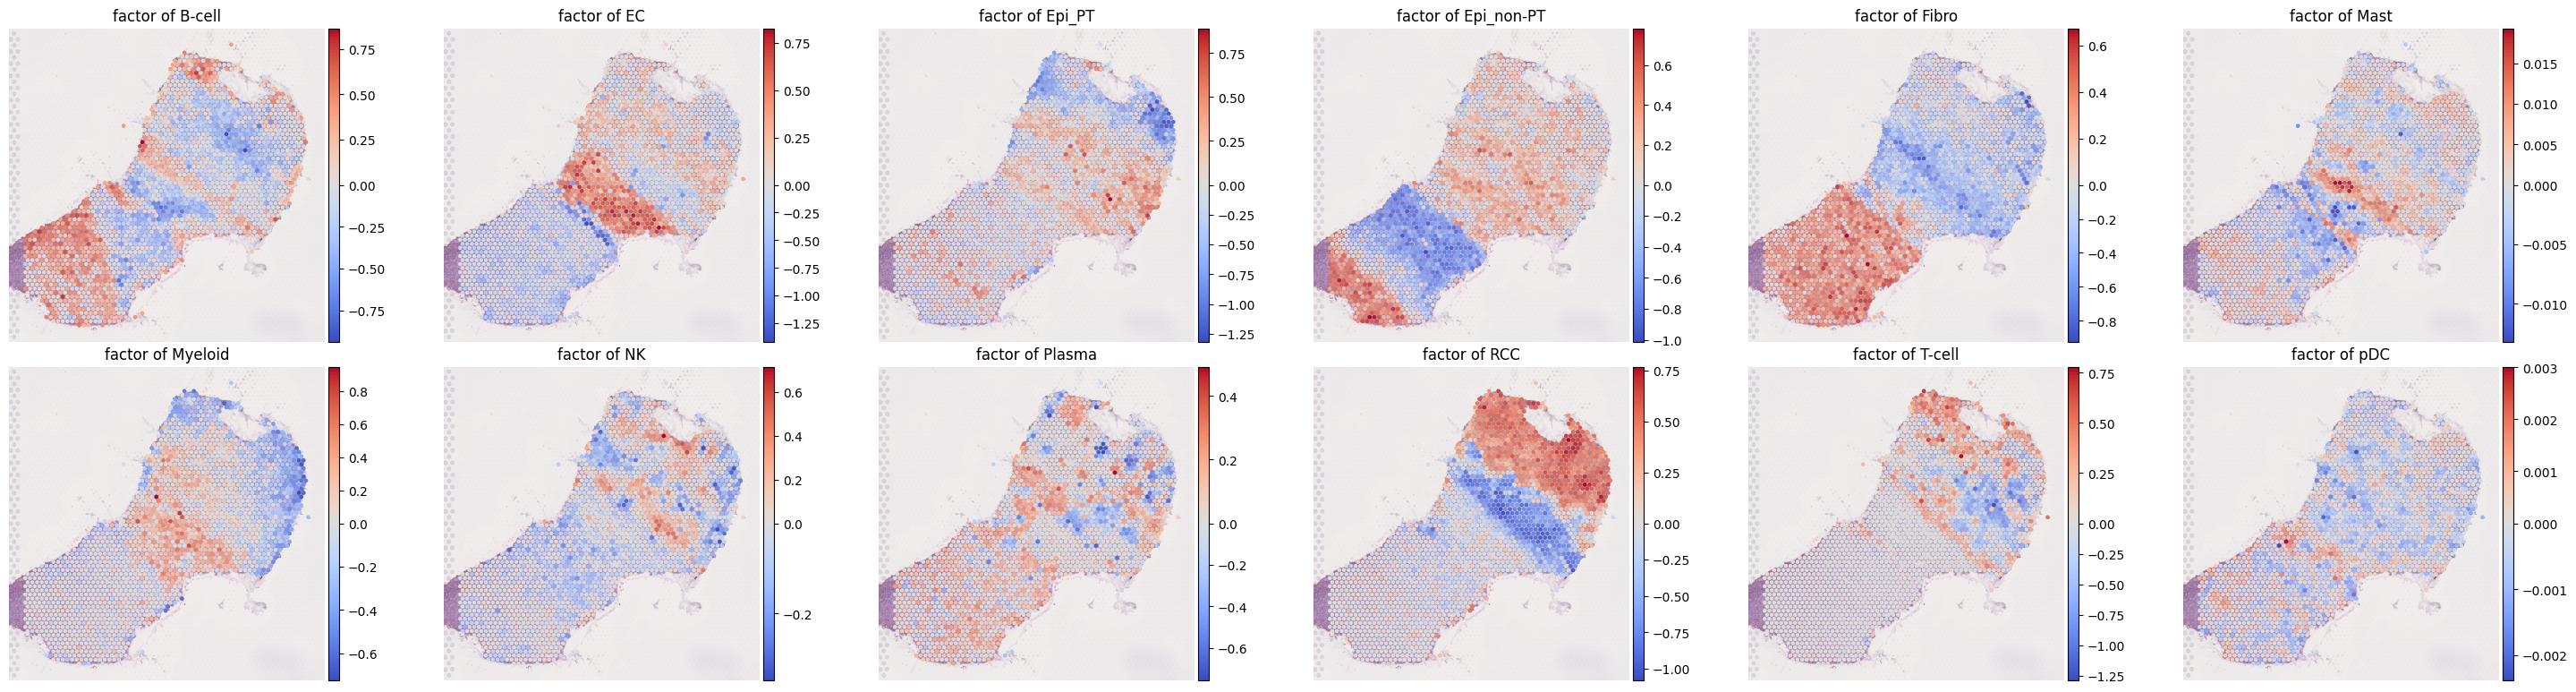

In [5]:
from MacSGP.vis import plot_spatial_ct

plot_spatial_ct(adata_result, index='factor', 
                proportion_threshold=0.0, num_threshold=100, 
                cmap='coolwarm', 
                spot_size=100, 
                ncols=6)